# We don't need exact copy of the image like in Template Matching 
There are 3 ways to apply feature matching :

    1- Brute force matching with ORB descriptors
    
    2- Brute force matching with SIFT descriptors and ratio test
    
    3- FLANN based matcher 

# Brute Force Matching with Descriptors

In [1]:
import cv2
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig=plt.figure(figsize=(12,10))
    ax=fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

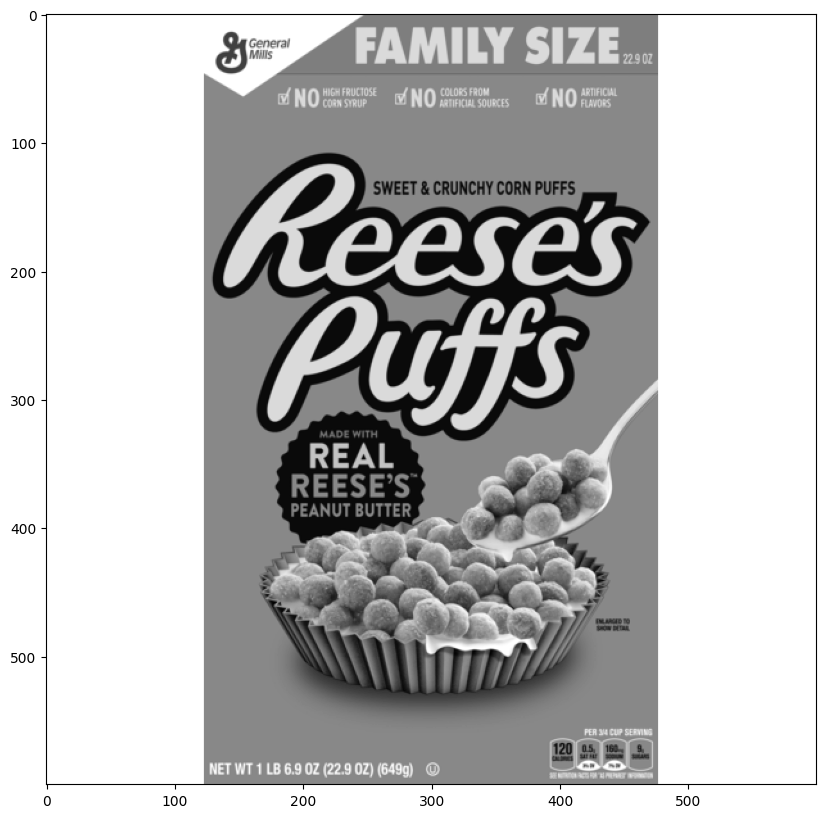

In [3]:
reeses= cv2.imread("D:\Reese's_Cereal_Box.png",0)
display(reeses)

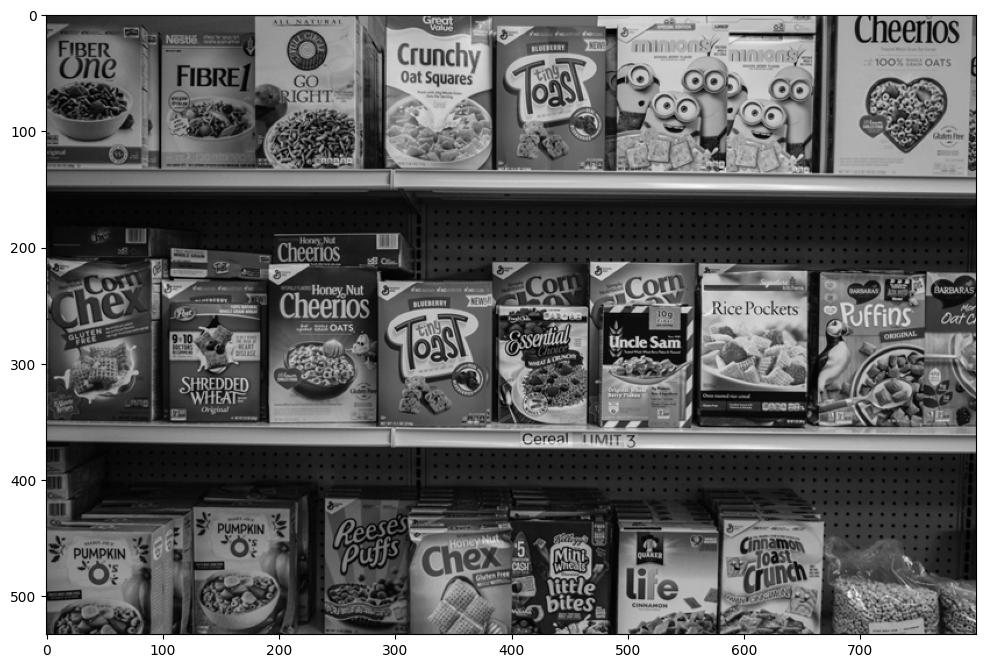

In [4]:
cereals= cv2.imread("D:\cereals.jpg",0)
display(cereals)

# What are keypoints in image processing?
https://stackoverflow.com/questions/29133085/what-are-keypoints-in-image-processing

#  Brute Force Matching with ORB Detector

https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html


# Create ORB object

In [5]:
orb = cv2.ORB_create()  # this is now is a detector object which detects and computes features

# find key points and descriptors for these object

In [6]:
kp1,des1= orb.detectAndCompute(reeses,None)   #Detects keypoints and computes the descriptors

In [7]:
# Do the same for cereals --> Detects keypoints and computes the descriptors
kp2,des2= orb.detectAndCompute(cereals,None)   

# Create Matching Object 

Where the most matching taking place

https://opencv24-python-tutorials.readthedocs.io/en/latest/py_tutorials/py_feature2d/py_matcher/py_matcher.html

NORM_HAMMING DISTANCE

https://stackoverflow.com/questions/43614497/orb-bfmatcher-why-norm-hamming-distance

In [8]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

Check where the matches occur

In [9]:
matches=bf.match(des1,des2)

Sort Matches in order to the Distances

In [10]:
single_match= matches[0]
single_match

< cv2.DMatch 000002384C780330>

In [11]:
single_match.distance   # The more distence the less match and the mosr distance approaches zero the more matches are good
                        # So we sort it 

79.0

In [12]:
matches= sorted(matches, key=lambda x : x.distance)

In [13]:
# Printing Distances after sorting 
for i in range(len( matches)):
    single_match= matches[i].distance
    print(single_match)
    

40.0
44.0
46.0
47.0
50.0
51.0
52.0
52.0
54.0
55.0
55.0
55.0
55.0
56.0
56.0
56.0
56.0
57.0
57.0
57.0
58.0
58.0
58.0
59.0
59.0
59.0
59.0
60.0
60.0
60.0
60.0
60.0
60.0
60.0
61.0
61.0
61.0
61.0
62.0
62.0
62.0
63.0
63.0
63.0
63.0
63.0
63.0
64.0
64.0
64.0
64.0
64.0
65.0
65.0
65.0
65.0
65.0
65.0
65.0
65.0
66.0
66.0
66.0
66.0
66.0
66.0
66.0
67.0
67.0
67.0
67.0
67.0
68.0
68.0
68.0
68.0
69.0
69.0
69.0
69.0
69.0
69.0
69.0
69.0
70.0
70.0
70.0
70.0
70.0
70.0
70.0
70.0
71.0
71.0
71.0
71.0
71.0
71.0
71.0
72.0
72.0
72.0
72.0
73.0
73.0
73.0
73.0
73.0
74.0
74.0
74.0
74.0
74.0
74.0
74.0
75.0
75.0
75.0
75.0
76.0
76.0
76.0
77.0
77.0
77.0
77.0
77.0
79.0
79.0
79.0
79.0
79.0
79.0
80.0
80.0
81.0
81.0
81.0
85.0


In [14]:
reeses_matches= cv2.drawMatches(reeses,kp1,cereals,kp2,matches,None,flags=2) #matches[:30]

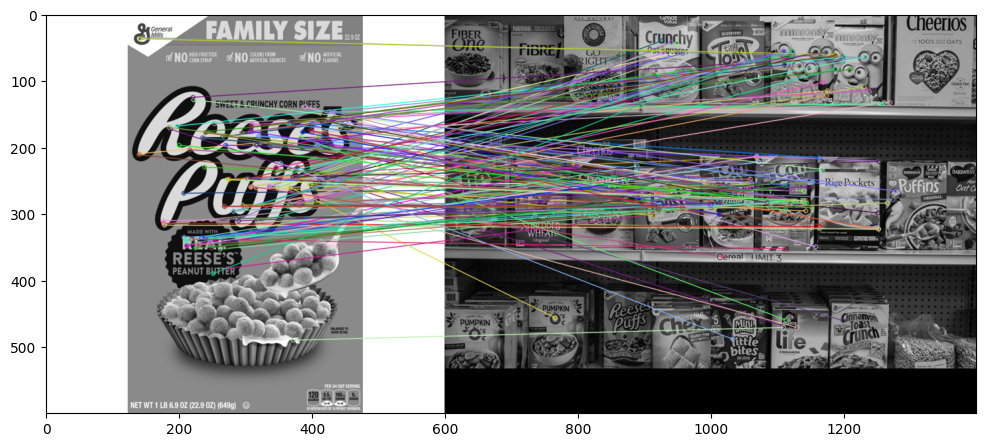

In [15]:
display(reeses_matches)

# Brute Force with SIFT Descriptor (Scale Invarient Feature Transform)

Good if images are different in scale

# Create SIFT object 

In [16]:
sift = cv2.SIFT_create()            

# find key points and descriptors for these object

In [17]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [18]:
bf = cv2.BFMatcher()

 Finds the k best matches for each descriptor from a query set.

In [19]:
matches = bf.knnMatch(des1,des2, k=2)

In [28]:
#type(matches)


In [21]:
#out = [item for t in matches for item in t]
#print(out)

# Apply Ratio Test

In [22]:
# the Less distance the better the match 
# If match1 is less than 75% of match2, then keep match1 
good = []
for match1,match2 in matches:
    if match1.distance < 0.75*match2.distance:
        good.append([match1])


In [25]:
len(good)

42

In [26]:
len(matches)

1539

In [23]:

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

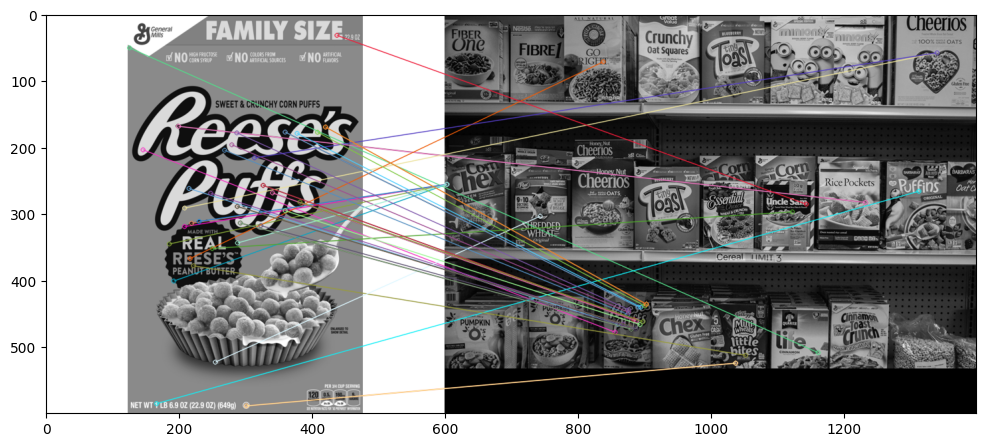

In [24]:
display(sift_matches)

# FLANN Based Matcher (Fast Library for Approximate Nearest Neighbors)

FLANN uses these algorithms:
    

FLANN_INDEX_LINEAR

FLANN_INDEX_KDTREE 

FLANN_INDEX_KMEANS 

FLANN_INDEX_COMPOSITE 

FLANN_INDEX_KDTREE_SINGLE

FLANN_INDEX_HIERARCHICAL

FLANN_INDEX_LSH    

In [29]:
sift = cv2.SIFT_create()

In [30]:
kp1,des1=sift.detectAndCompute(reeses,None)
kp2,des2=sift.detectAndCompute(cereals,None)

# Define FLANN Parameters

It is more faster than Brute Force method but it can not find the best possible matches, instead it is find the GENERAL good 
matches and we can play with FLANN parameter in order to increase the quality of precision, but it will slow the Algorithm.
"FLANN is much faster than BF, But it only finds approximate nearest neighbors which is good matching but not necessarily the best"

In [32]:
# FLANN default Parameter

FLANN_INDEX_KDTREE = 0

index_params= dict(algorithm=FLANN_INDEX_KDTREE,trees=5)

search_params=dict(checks=50)

Checks: specifies the maximum leafs to visit when searching for neighbours. A higher value for this
parameter would give better search precision

In [33]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [34]:
matches= flann.knnMatch(des1,des2,k=2)

In [36]:
good=[]
for match1,match2 in matches:
    if match1.distance<0.75*match2.distance:
        good.append([match1])

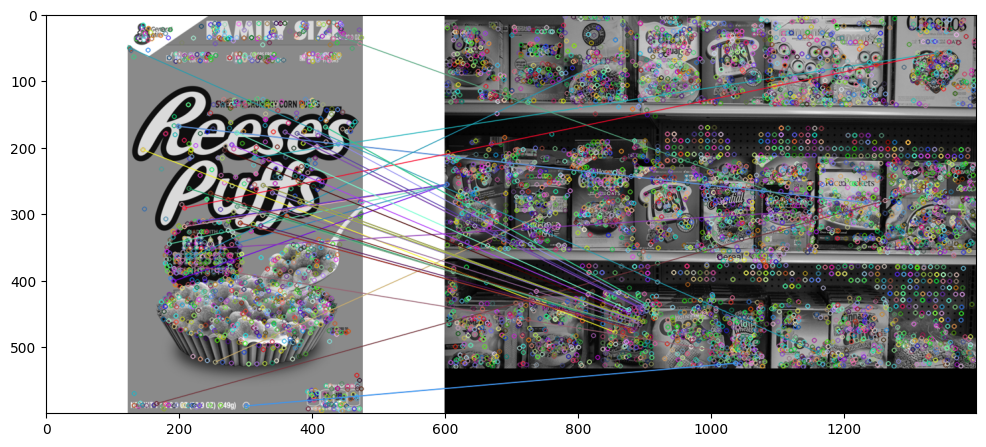

In [41]:
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=0)
display(flann_matches)

In [ ]:
#better Drawing